In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter

In [16]:
# df = pd.read_csv('D:/data notes/Case study/Pandas-Data-Analysis-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

all_months_data = pd.DataFrame()

files = [file for file in os.listdir('D:/data notes/Case study/Pandas-Electronics_sales_analysis/SalesAnalysis/Sales_Data')]

for file in files:
    df = pd.read_csv('D:/data notes/Case study/Pandas-Electronics_sales_analysis/SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df], axis = 0)
    
all_months_data.info()

all_months_data.to_csv('all_data.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


#### Read tha dataframe

In [18]:
all_data = pd.read_csv('D:/data notes/Case study/Pandas-Electronics_sales_analysis/SalesAnalysis/Sales_Data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Celan up tha data!

*Drop rows of NaN*

In [19]:
pd.isnull(all_data).sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [20]:
all_data.dropna(inplace = True)

In [21]:
pd.isnull(all_data).sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

*Find 'Or' and delete it*

In [24]:
all_data = all_data[all_data['Order Date'].str[0 : 2] != 'Or']

*Convert columns to the currect type*

In [25]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment data with additional columns

#### Task 2: Add Month Column

In [27]:
all_data['Month'] = all_data['Order Date'].str[0 : 2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column

In [32]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Task 5: Add Hour and Minute column

In [33]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

C:\Users\Advaith\AppData\Local\Temp\ipykernel_6436\1435542791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [34]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


##### Question 1: What was the best month for sales? How much earned that month?

In [35]:
sales_by_month = all_data.groupby(['Month'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
sales_by_month.head()

,Month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75


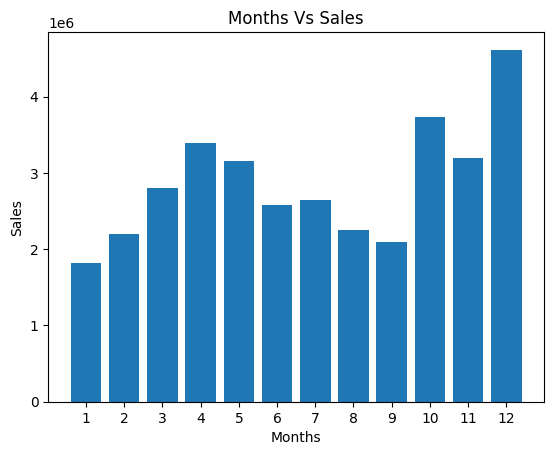

In [37]:
plt.bar(sales_by_month['Month'], sales_by_month['Sales'])
plt.xticks(sales_by_month['Month'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Months Vs Sales')
plt.show()

*By looking at the above plot we can say that the December, October, and April as the best months for sales*

#### Question 2: what city had the highest number of sales? 

In [38]:
Sales_by_city = all_data.groupby(['City'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
Sales_by_city.head()

,City,Sales
8,San Francisco (CA),8262203.91
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
2,Boston (MA),3661642.01
0,Atlanta (GA),2795498.58


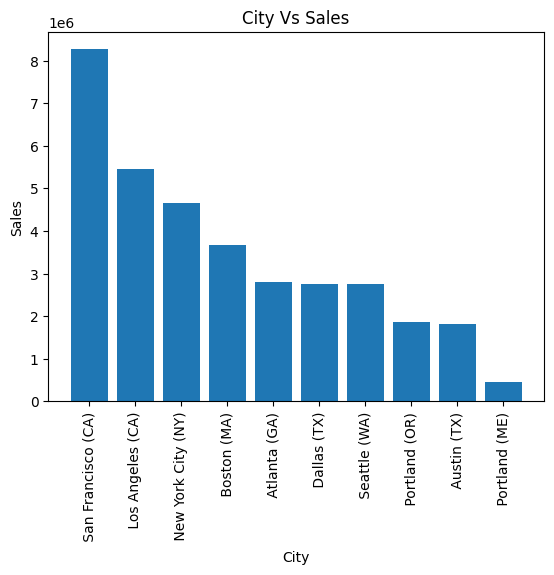

In [42]:
plt.bar(Sales_by_city['City'], Sales_by_city['Sales'])
plt.xticks(Sales_by_city['City'], rotation = 'vertical')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('City Vs Sales')
plt.show()

*By looking at the above plot, we can say tha San Francisco (CA), Los Angeles (CA), and New York City (NY) citys had the highest number of sales*

#### Question 3: What time should we display advertisments to maximize likelihood of customer's buying product?

In [43]:
order_per_hour = all_data.groupby(['Hour'], as_index = False)['Hour'].count()
order_per_hour.head()

,Hour
0,3910
1,2350
2,1243
3,831
4,854


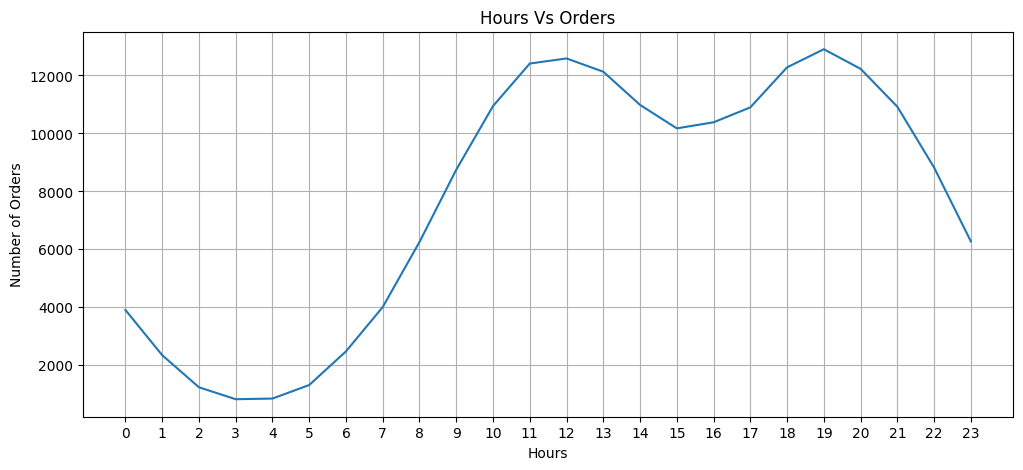

In [50]:
hours = [hour for hour, df in all_data.groupby('Hour')]
fig = plt.figure(figsize = (12, 5))
plt.plot(order_per_hour['Hour'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('Hours Vs Orders')
plt.grid()
plt.show()

*By looking at the above plot we can say tha 11:00 AM to 1:00 PM and 6:00 PM to 8:00 PM are the peak hours, displaying advertisment at 10:00 AM and 5:00 PM will maximize the liklihood of customer's buying product's*

#### Question 4: What are the products that have contributed  most of the sales?

In [87]:
product_sales = all_data.groupby(['Product'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
product_sales.head()

,Product,Sales
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56


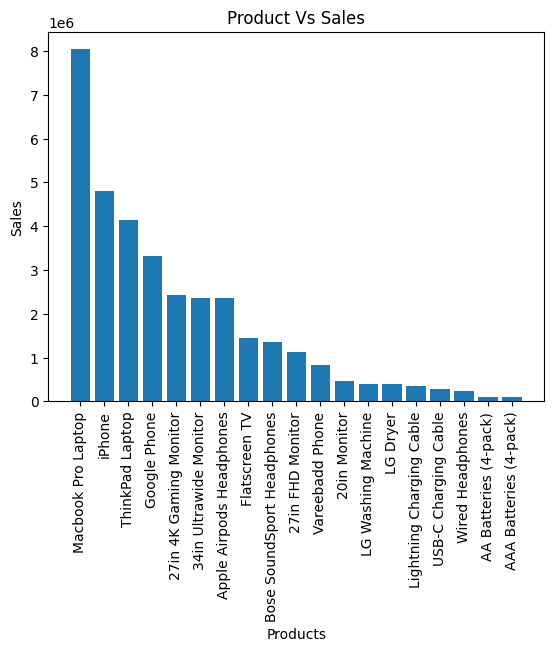

In [90]:
plt.bar(product_sales['Product'], product_sales['Sales'])
plt.xticks(product_sales['Product'], rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Product Vs Sales')
plt.show()

*By looking at the above plot we can say that Mackbook Pro Laptop, iPhone, and ThinkPad Laptop are the product which have contributed the most for the sales*

#### Question 5: What products are most often sold togather?

In [54]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [57]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, valus in count.most_common(10):
    print(key, valus)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


*By looking at the above information we can say that the ('iPhone', 'Lightning Charging Cable'), ('Google Phone', 'USB-C Charging Cable'), and ('iPhone', 'Wired Headphones') are most often sold togather*

#### Question 6: What product sold the most? Why do you think it sold the most?

In [64]:
most_sold_product = all_data.groupby(['Product'], as_index = False)['Quantity Ordered'].sum()
most_sold_product.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


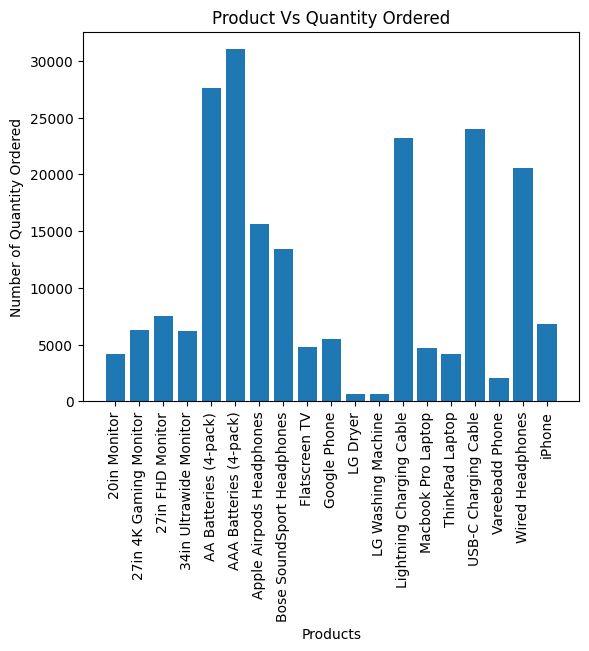

In [65]:
plt.bar(most_sold_product['Product'], most_sold_product['Quantity Ordered'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Number of Quantity Ordered')
plt.title('Product Vs Quantity Ordered')
plt.show()

*By looking at the above plot we can say that AAA Batteries(4-pack), AA Batteries (4-pack), and USB-C Charging Cable are the most sold product*

In [75]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

products = [product for product, df in product_group]

In [67]:
prices = all_data.groupby(['Product'])['Price Each'].mean()
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

C:\Users\Advaith\AppData\Local\Temp\ipykernel_6436\3468553368.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 'vertical')


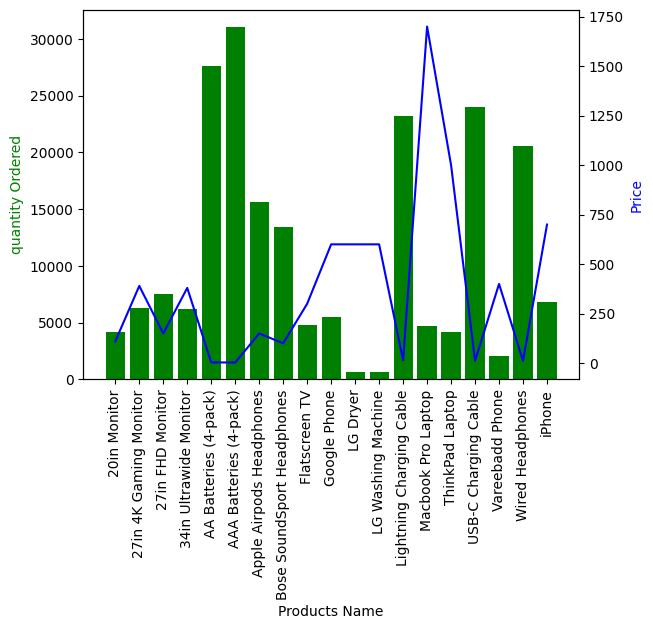

In [86]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products Name')
ax1.set_ylabel('quantity Ordered', color = 'g')
ax2.set_ylabel('Price', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical')

plt.show()

*By looking at the above plot we can say that the avg price of each product and its sales is kinda correlated inversly, if the price of the product is high the sales is low of the product, if the price of that product is low the sales is high of that product*

### Conclusion:

During the month of December, October, and April in San Francisco (CA), Los Angeles (CA), and New York City (NY) at 11:00 AM to 1:00 PM and 6:00 PM to 8:00 PM, Mackbook Pro Laptop, iPhone, and ThinkPad Laptop are the product which have contributed the most for the sales, 
('iPhone', 'Lightning Charging Cable'), ('Google Phone', 'USB-C Charging Cable'), and ('iPhone', 'Wired Headphones') are most often sold togather,
 AAA Batteries(4-pack), AA Batteries (4-pack), and USB-C Charging Cable are the most sold product